# Библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score 

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, LeakyReLU

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.models import Sequential
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings("ignore")

2.12.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# загрузим подготовленный на предыдущем этапе датасет (объединенный, очищенный от шумов и выбросов)
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/Копия1 X_CLEAR.xlsx') 

In [6]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


Выделение предикторов и целевых переменных

In [8]:
# Признаки для 3-й задачи
y_columns = ['Соотношение матрица-наполнитель']
X_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [9]:
y = df.loc[:, y_columns]
X = df.loc[:, X_columns]

In [10]:
# Разделяем на тренировочную и тестовую выборку
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48, shuffle=True)
print('X_train:', X_train_raw.shape, 'y1_train:', y_train.shape)
print('X_test:', X_test_raw.shape, 'y1_test:', y_test.shape)

X_train: (700, 12) y1_train: (700, 1)
X_test: (300, 12) y1_test: (300, 1)


In [11]:
# проверим правильность разбиения на выборки
df.shape[0] - X_train_raw.shape[0] - X_test_raw.shape[0]

0

# **Препроцессинг**

In [12]:
# попробуем нормализацию  данных с помощью MinMaxScaler
scaler = MinMaxScaler()
scaler_norm = ColumnTransformer(transformers=[('scaler', scaler, X_columns)])
X_train = scaler_norm.fit_transform(X_train_raw)
X_test = scaler_norm.transform(X_test_raw)

In [17]:
#двумерные массивы y_train и y_test принимают исходные значения
y_train = y_train['Соотношение матрица-наполнитель'].values
y_test = y_test['Соотношение матрица-наполнитель'].values

Проверяем разделение на выборки после нормализации

In [13]:
X_train.shape

(700, 12)

In [14]:
X_test.shape

(300, 12)

In [36]:
pd.DataFrame(y_train, columns=y_columns).shape

(700, 1)

In [37]:
pd.DataFrame(y_test, columns=y_columns).shape

(300, 1)

**Посмотрим описательную статистику до и после предобработки**

До нормализации:

In [31]:
X_train_raw.describe().loc[['min', 'max', '50%', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,1784.482,9.986,29.956,15.696,173.485,1.668,65.553,1036.857,41.048,0.000,0.145,20.572
max,2192.739,1649.416,192.852,28.955,396.898,1238.476,82.682,3848.437,386.903,1.000,14.376,89.877
50%,1974.807,742.464,110.454,22.187,284.615,443.998,73.335,2448.608,216.692,1.000,7.000,57.686
mean,1972.982,744.270,110.904,22.222,284.521,472.354,73.371,2454.309,216.613,0.507,6.987,57.163
std,73.205,324.405,27.272,2.366,40.015,278.013,3.103,486.392,57.620,0.500,2.558,11.752


In [30]:
X_test_raw.describe().loc[['min', 'max', '50%', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,1786.036,2.437,33.624,16.668,189.867,0.604,64.054,1143.210,63.686,0.000,0.038,23.898
max,2182.752,1628.000,192.334,28.620,403.653,1291.340,82.526,3791.073,378.757,1.000,14.441,92.963
50%,1981.090,736.750,111.507,22.268,289.078,463.787,72.932,2496.348,220.523,0.000,6.702,57.000
mean,1981.050,725.622,110.631,22.267,289.308,497.361,73.195,2489.493,222.082,0.470,6.732,57.542
std,72.171,334.942,29.262,2.430,40.602,276.669,3.141,481.696,61.856,0.500,2.552,12.078


In [29]:
pd.DataFrame(y_train, columns=y_columns).describe().loc[['min', 'max', '50%', 'mean', 'std'], :].style\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,Соотношение матрица-наполнитель
min,0.389
max,5.592
50%,2.896
mean,2.926
std,0.923


In [28]:
pd.DataFrame(y_test, columns=y_columns).describe().loc[['min', 'max', '50%', 'mean', 'std'], :].style\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,Соотношение матрица-наполнитель
min,0.597
max,5.456
50%,2.951
mean,2.961
std,0.876


После:

In [32]:
pd.DataFrame(X_train, columns=X_columns).describe().loc[['min', 'max', '50%', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
50%,0.466,0.447,0.494,0.490,0.497,0.358,0.454,0.502,0.508,1.000,0.482,0.536
mean,0.462,0.448,0.497,0.492,0.497,0.381,0.456,0.504,0.508,0.507,0.481,0.528
std,0.179,0.198,0.167,0.178,0.179,0.225,0.181,0.173,0.167,0.500,0.180,0.170


In [33]:
pd.DataFrame(X_test, columns=X_columns).describe().loc[['min', 'max', '50%', 'mean', 'std'], :].style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.004,-0.005,0.023,0.073,0.073,-0.001,-0.088,0.038,0.065,0.000,-0.008,0.048
max,0.976,0.987,0.997,0.975,1.030,1.043,0.991,0.980,0.976,1.000,1.005,1.045
50%,0.482,0.443,0.501,0.496,0.517,0.374,0.431,0.519,0.519,0.000,0.461,0.526
mean,0.481,0.437,0.495,0.496,0.518,0.401,0.446,0.517,0.523,0.470,0.463,0.533
std,0.177,0.204,0.180,0.183,0.182,0.224,0.183,0.171,0.179,0.500,0.179,0.174


Средние и медианные значения выборок для входящих переменных получились очень близзки, что говорит о пригодности данных для следующего этапа

In [34]:
pd.DataFrame(y_test, columns=y_columns).describe().loc[['min', 'max', '50%', 'mean', 'std'], :].style\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')

,Соотношение матрица-наполнитель
min,0.597
max,5.456
50%,2.951
mean,2.961
std,0.876


# **Модель предсказания Соотношение матрица-наполнитель**

В качестве метрики для оценки моделей возьмём среднюю абсолютную ошибку (**mae**), также на более удачных моделях сравним метрики на тренировочной и тестовой выборках, в т.ч.коэффициент детерминации (**R2**)

# **Полносвязная нейронная сеть**

Строим, компилируем нейронную сеть с помощью библиотеки TensorFlow.

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 18)                234       
                                                                 
 dropout_20 (Dropout)        (None, 18)                0         
                                                                 
 dense_61 (Dense)            (None, 12)                228       
                                                                 
 dense_62 (Dense)            (None, 1)                 13        
                                                                 
Total params: 475
Trainable params: 475
Non-trainable params: 0
_________________________________________________________________
Epoch 1/52
16/16 - 1s - loss: 10.4666 - mae: 3.0919 - val_loss: 8.7018 - val_mae: 2.8274 - 882ms/epoch - 55ms/step
Epoch 2/52
16/16 - 0s - loss: 9.0184 - mae: 2.8472 - val_loss: 7.3531 - 

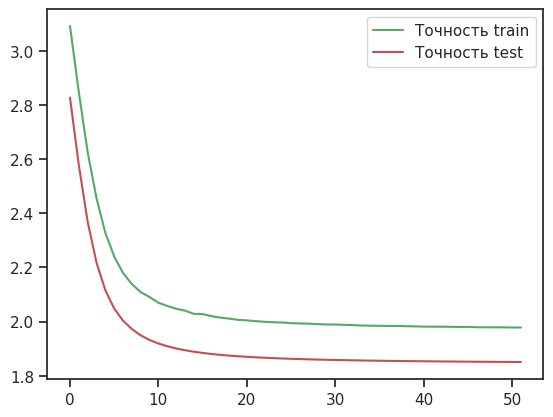

In [58]:
# модель 1 полносвязной нейронной сети для целевой переменной y
modelMF_1 = Sequential()
modelMF_1.add(Dense(18,  input_dim=12, activation = 'sigmoid')) # 18 # задаем архитектуру последовательной нейросети и слои
modelMF_1.add(Dropout(0.5))                                     # слой для снижения переобучения
modelMF_1.add(Dense(12, activation = 'sigmoid')) # 14
modelMF_1.add(Dense(1, activation = 'tanh'))
modelMF_1.compile(optimizer='adam', loss='mse', metrics=['mae']) # оптимизатор 'adam', функц.потерь'mse' и метр.'mae'
modelMF_1.summary()   # посмотрим на архитектуру
history = modelMF_1.fit(X_train,y_train, 
                    epochs=52, # 48
                    validation_split=0.3, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train', color = 'g') # история о значениях метрики на обучающей выборке в каждой эпохе
plt.plot(history.history['val_mae'], label = 'Точность test', color = 'r') # история на тестовых данных
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show() # выведем графики соотношения на трен. и тест. выборках
# loss='mse' задает функцию потерь, которая измеряет разницу между прогнозируемыми значениями и истинными значениями целевой переменной
# цель обучения нейронной сети заключается в минимизации функции потерь

In [59]:
# оцениваем точность нейросети на тестовых данных
modelMF_1.evaluate(X_test, y_test, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 4.6315 - mae: 1.9707


[4.631505966186523, 1.9706939458847046]

In [60]:
# Предсказание 
y_prediction_1 = modelMF_1.predict(X_test)

10/10 [==============================] - 0s 1ms/step


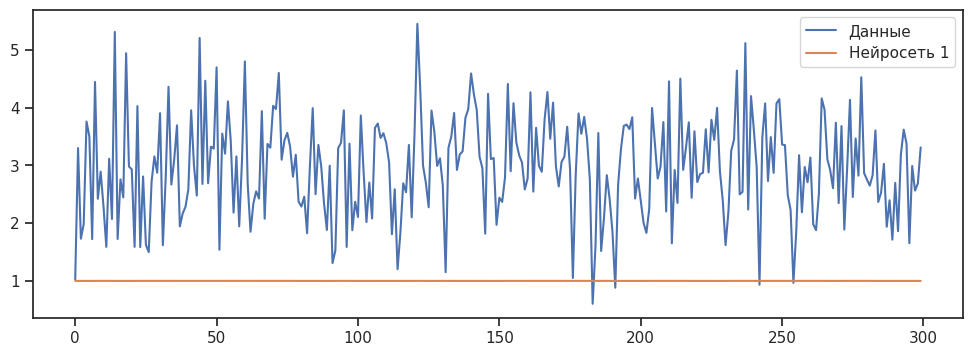

In [61]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y_test, label='Данные')
ax.plot(y_prediction_1, label='Нейросеть 1')
ax.legend()
plt.show()

Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_450 (Dense)           (None, 16)                208       
                                                                 
 dropout_118 (Dropout)       (None, 16)                0         
                                                                 
 dense_451 (Dense)           (None, 32)                544       
                                                                 
 dense_452 (Dense)           (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
20/20 - 1s - loss: 3.5077 - mae: 1.6398 - val_loss: 1.5295 - val_mae: 1.0332 - 875ms/epoch - 44ms/step
Epoch 2/150
20/20 - 0s - loss: 1.8625 - mae: 1.1125 - val_loss: 0.7175 

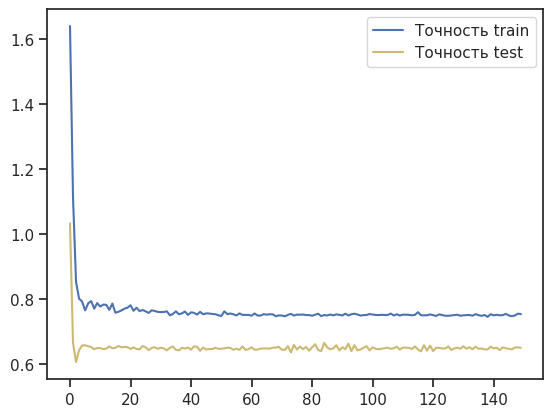

In [216]:
# тренируем модель полносвязной нейронной сети с другой архитектурой и активатором выходного слоя
modelMF_2 = tf.keras.Sequential([
    keras.layers.Dense(16,  input_dim=12, activation = 'sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'relu')
])
modelMF_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelMF_2.summary()
history = modelMF_2.fit(X_train,y_train, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train', color = 'b')
plt.plot(history.history['val_mae'], label = 'Точность test', color = 'y')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [223]:
# оцениваем точность нейросети на тестовых данных
modelMF_2.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - loss: 0.7644 - mae: 0.6956 - 30ms/epoch - 3ms/step


[0.7643697261810303, 0.6956464052200317]

In [218]:
# Предсказание 
y_prediction_2 = modelMF_2.predict(X_test)

10/10 [==============================] - 0s 1ms/step


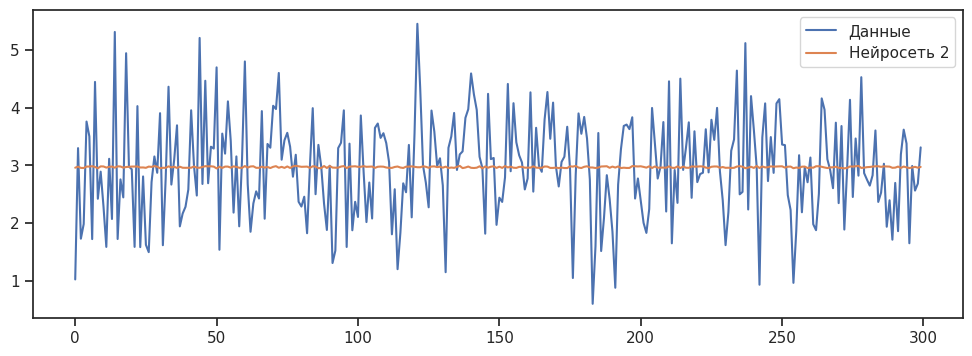

In [219]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y_test, label='Данные')
ax.plot(y_prediction_2, label='Нейросеть 2')
ax.legend()
plt.show()

In [220]:
def modelget_metrics(model_name, y, y_pred):
    model_stats = pd.DataFrame()
    model_stats.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    model_stats.loc[model_name, 'RMSE'] = -metrics.mean_squared_error(y, y_pred, squared=False)
    model_stats.loc[model_name, 'MAE'] = -metrics.mean_absolute_error(y, y_pred)
    model_stats.loc[model_name, 'MAPE'] = -metrics.mean_absolute_percentage_error(y, y_pred)
    model_stats.loc[model_name, 'max_error'] = -metrics.max_error(y, y_pred)
    return model_stats

In [222]:
result = pd.DataFrame()
y2_pred_train = modelMF_2.predict(X_train)
result = pd.concat([result, modelget_metrics('Соотношение матрица-наполнитель, тренировочный', y_train, y2_pred_train)])
y2_pred_test = modelMF_2.predict(X_test)
result = pd.concat([result, modelget_metrics('Соотношение матрица-наполнитель, тестовый', y_test, y2_pred_test)])
result

10/10 [==============================] - 0s 2ms/step


,R2,RMSE,MAE,MAPE,max_error
"Соотношение матрица-наполнитель, тренировочный",0.000023,-0.922384,-0.740692,-0.328859,-2.610752
"Соотношение матрица-наполнитель, тестовый",-0.000366,-0.874282,-0.695646,-0.295896,-2.489102


Нейросеть 2 обучилась, метрики немного улучшились, а не подстроились

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_453 (Dense)           (None, 32)                416       
                                                                 
 dropout_119 (Dropout)       (None, 32)                0         
                                                                 
 dense_454 (Dense)           (None, 64)                2112      
                                                                 
 dropout_120 (Dropout)       (None, 64)                0         
                                                                 
 dense_455 (Dense)           (None, 32)                2080      
                                                                 
 dense_456 (Dense)           (None, 16)                528       
                                                                 
 dense_457 (Dense)           (None, 1)              

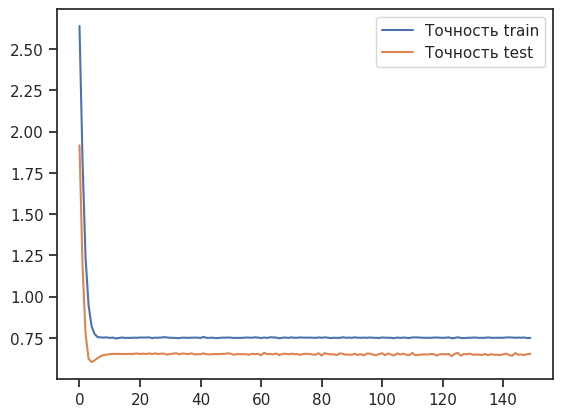

In [224]:
# модель 3 полносвязной нейронной сети с более сложной архитектурой, тренируем
modelMF_3 = tf.keras.Sequential([
                keras.layers.Dense(32,  input_dim=12, activation = 'sigmoid'),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(64, activation = 'sigmoid'),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(32, activation = 'sigmoid'),
                keras.layers.Dense(16, activation = 'sigmoid'),
                keras.layers.Dense(1, activation = 'linear')])
modelMF_3.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelMF_3.summary()
history = modelMF_3.fit(X_train, y_train, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [225]:
# оцениваем точность нейросети на тестовых данных
modelMF_3.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - loss: 0.7644 - mae: 0.6952 - 45ms/epoch - 5ms/step


[0.7644139528274536, 0.6952219009399414]

In [226]:
# Предсказание 
y_prediction_3 = modelMF_3.predict(X_test)

10/10 [==============================] - 0s 1ms/step


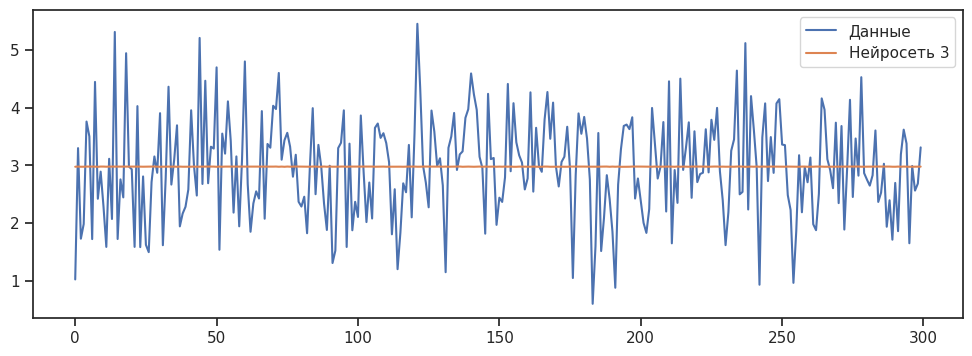

In [227]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y_test, label='Данные')
ax.plot(y_prediction_3, label='Нейросеть 3')
ax.legend()
plt.show()

In [ ]:
# посмотрим по метрикам

In [228]:
result = pd.DataFrame()
y3_pred_train = modelMF_3.predict(X_train)
result = pd.concat([result, modelget_metrics('Соотношение матрица-наполнитель, тренировочный', y_train, y3_pred_train)])
y3_pred_test = modelMF_3.predict(X_test)
result = pd.concat([result, modelget_metrics('Соотношение матрица-наполнитель, тестовый', y_test, y3_pred_test)])
result

10/10 [==============================] - 0s 2ms/step


,R2,RMSE,MAE,MAPE,max_error
"Соотношение матрица-наполнитель, тренировочный",-0.002767,-0.923670,-0.741881,-0.330315,-2.613384
"Соотношение матрица-наполнитель, тестовый",-0.000423,-0.874308,-0.695222,-0.296718,-2.479797


После обучения нейросети 3 получили коэффициент детерменации отрицательный, но уже лучше на наборе реальных данных, остальные метрики улучшились незначительно

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 18)                234       
                                                                 
 dense_173 (Dense)           (None, 18)                342       
                                                                 
 dense_174 (Dense)           (None, 1)                 19        
                                                                 
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
16/16 - 1s - loss: 6.3561 - mae: 2.3357 - val_loss: 5.4009 - val_mae: 2.1680 - 743ms/epoch - 46ms/step
Epoch 2/60
16/16 - 0s - loss: 5.9971 - mae: 2.2576 - val_loss: 5.0976 - val_mae: 2.0975 - 63ms/epoch - 4ms/step
Epoch 3/60
16/16 - 0s - loss: 5.7114 - mae: 2.1938 - val_loss: 4.8680 - val_mae: 2.0425 - 47m

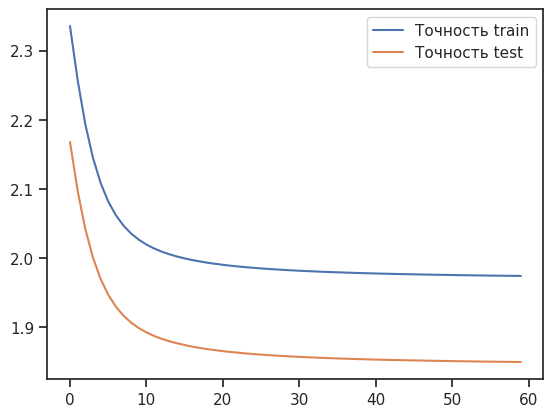

In [104]:
# Нейросеть-4, модель полносвязной нейронной сети для целевого параметра y
modelMF_4 = Sequential()
modelMF_4.add(Dense(18,  input_dim=12, activation = 'sigmoid'))
modelMF_4.add(Dense(18, activation = 'sigmoid'))
modelMF_4.add(Dense(1, activation = 'sigmoid'))
modelMF_4.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelMF_4.summary()
history = modelMF_4.fit(
                  X_train,
                  y_train, 
                  epochs=60, 
                  validation_split=0.3,  # обучение 70/30
                  verbose=2,
                  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)] # попробуем раннюю остановку обучения
                  )
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_383 (Dense)           (None, 100)               1300      
                                                                 
 dropout_115 (Dropout)       (None, 100)               0         
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 100)               0         
                                                                 
 dense_384 (Dense)           (None, 50)                5050      
                                                                 
 dropout_116 (Dropout)       (None, 50)                0         
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 50)                0         
                                                                 
 dense_385 (Dense)           (None, 25)             

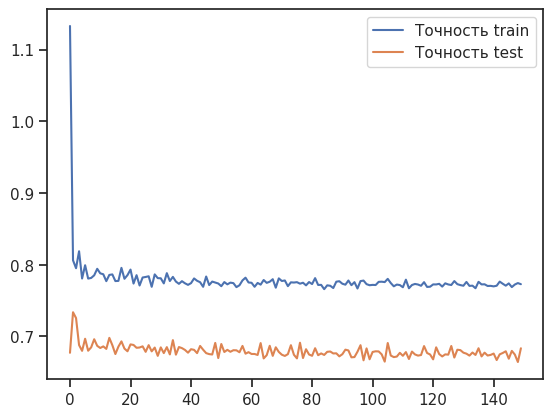

In [155]:
# Нейросеть-5, модель полносвязной нейронной сети для целевого параметра y, тренируем на нормализованных данных
modelMF_5 = Sequential([
    Dense(100,  input_dim=12, activation = 'sigmoid'),
    Dropout(0.5),
    LeakyReLU(alpha=1.0),
    Dense(50, activation = 'sigmoid'),
    Dropout(0.5),
    LeakyReLU(alpha=1.0),
    Dense(25, activation = 'sigmoid'),
    Dense(1, activation = 'linear')
])

modelMF_5.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelMF_5.summary()
history = modelMF_5.fit(X_train,y_train, 
                    epochs=150, 
                    validation_split=0.3, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_458 (Dense)           (None, 10)                130       
                                                                 
 leaky_re_lu_89 (LeakyReLU)  (None, 10)                0         
                                                                 
 dense_459 (Dense)           (None, 10)                110       
                                                                 
 leaky_re_lu_90 (LeakyReLU)  (None, 10)                0         
                                                                 
 dense_460 (Dense)           (None, 10)                110       
                                                                 
 dense_461 (Dense)           (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainabl

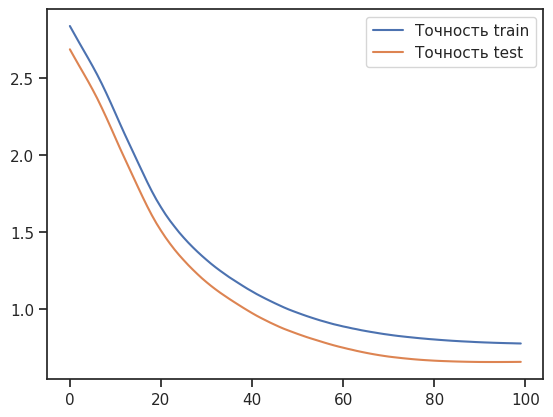

In [231]:
# Нейросеть 6
modelMF_6 = tf.keras.models.Sequential([
    keras.layers.Dense(10, input_dim=12, activation='sigmoid'),
    keras.layers.LeakyReLU(alpha=1.0),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.LeakyReLU(alpha=1.0),
    keras.layers.Dense(10, activation='softmax')
])

modelMF_6.add(Dense(1, activation='linear'))
modelMF_6.compile(optimizer='adam', loss='mse', metrics=['mae'])

modelMF_6.summary()
history = modelMF_6.fit(X_train,y_train, 
                    epochs=100, 
                    validation_split=0.3, 
                    verbose=2) 
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [232]:
# оцениваем точность нейросети на тестовых данных
modelMF_6.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - loss: 0.7836 - mae: 0.7041 - 38ms/epoch - 4ms/step


[0.7836434841156006, 0.7041135430335999]

In [233]:
# Предсказание 
y_prediction_6 = modelMF_6.predict(X_test)

10/10 [==============================] - 0s 2ms/step


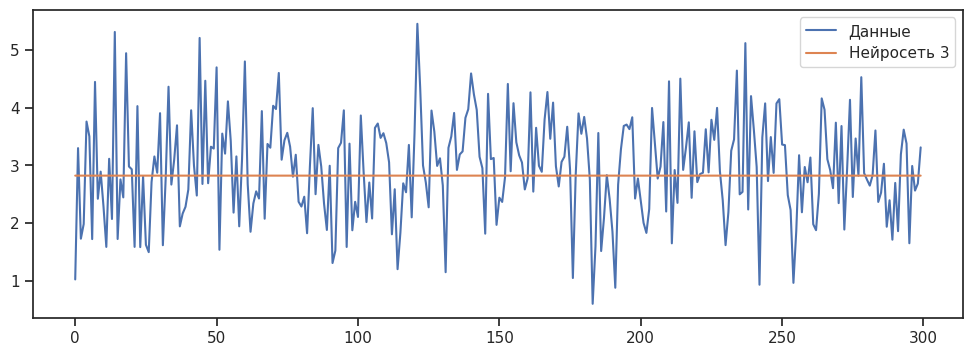

In [234]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y_test, label='Данные')
ax.plot(y_prediction_6, label='Нейросеть 3')
ax.legend()
plt.show()

In [235]:
result = pd.DataFrame()
y6_pred_train = modelMF_6.predict(X_train)
result = pd.concat([result, modelget_metrics('Соотношение матрица-наполнитель, тренировочный', y_train, y6_pred_train)])
y6_pred_test = modelMF_6.predict(X_test)
result = pd.concat([result, modelget_metrics('Соотношение матрица-наполнитель, тестовый', y_test, y6_pred_test)])
result

10/10 [==============================] - 0s 1ms/step


,R2,RMSE,MAE,MAPE,max_error
"Соотношение матрица-наполнитель, тренировочный",-0.012911,-0.928330,-0.740805,-0.312754,-2.770808
"Соотношение матрица-наполнитель, тестовый",-0.025590,-0.885236,-0.704114,-0.284270,-2.634529


# сравнение по метрике 

In [236]:
MAE = []
models = [modelMF_1, modelMF_2, modelMF_3, modelMF_4, modelMF_5, modelMF_6]
for i, model in enumerate(models, start=1):
    y_pred = model.predict(X_test_raw)
    MAE_i = mean_absolute_error(y_test, y_pred)
    model_name = f"Нейросеть {i}"
    MAE.append([model_name, MAE_i])
    # результаты расчета ошибок выведем в таблицу
MAE_table = pd.DataFrame(data=MAE, columns=['Версия нейросети', 'MAE'])
display(MAE_table) 

10/10 [==============================] - 0s 1ms/step


,Версия нейросети,MAE
0,Нейросеть 1,1.969044
1,Нейросеть 2,0.695281
2,Нейросеть 3,0.695293
3,Нейросеть 4,1.965212
4,Нейросеть 5,0.702981
5,Нейросеть 6,0.704050


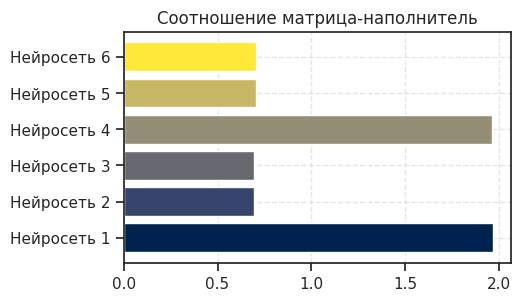

In [237]:
# Гистограмма распределения ошибки
colors = plt.cm.cividis(np.linspace(0, 1, len(MAE_table)))
plt.figure(figsize=(5, 3))
plt.barh(MAE_table['Версия нейросети'], MAE_table['MAE'], color=colors)
plt.title('Соотношение матрица-наполнитель')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [238]:
# Запишем результаты сравнения в файл
MAE_table.to_excel('/content/drive/MyDrive/Colab Notebooks/Result_errors/MAE_errors.xlsx', index=0)


Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_472 (Dense)           (None, 16)                208       
                                                                 
 dropout_123 (Dropout)       (None, 16)                0         
                                                                 
 dense_473 (Dense)           (None, 32)                544       
                                                                 
 dense_474 (Dense)           (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
20/20 - 1s - loss: 3.1376 - mae: 1.5247 - val_loss: 1.2546 - val_mae: 0.9059 - 767ms/epoch - 38ms/step
Epoch 2/150
20/20 - 0s - loss: 1.6744 - mae: 1.0471 - val_loss: 0.6336 

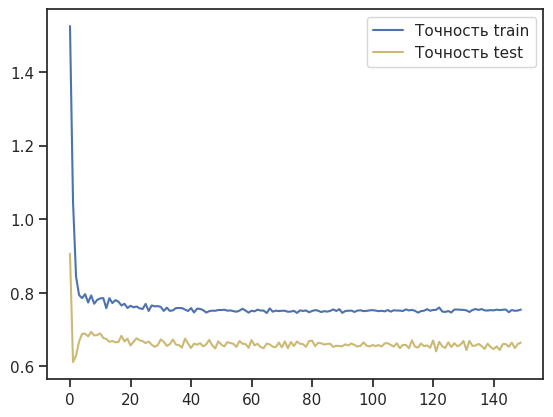

In [256]:
# проверка на ненормализованных данных
modelNN_raw = tf.keras.Sequential([
    keras.layers.Dense(16,  input_dim=12, activation = 'sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'relu')
])
modelNN_raw.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_raw.summary()
history = modelNN_raw.fit(X_train_raw,y_train, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train', color = 'b')
plt.plot(history.history['val_mae'], label = 'Точность test', color = 'y')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Для интеграции в приложение модели нейросети нужно сохранить

In [257]:
y_pred_22 = modelNN_raw.predict(X_test_raw)
MAE = mean_absolute_error(y_test,y_pred_22)
print (MAE)

10/10 [==============================] - 0s 1ms/step
0.6977066631267502


In [258]:
modelMF_2.save('/content/drive/MyDrive/Colab Notebooks/Models_NN/modelNN_2')

In [259]:
modelMF_3.save('/content/drive/MyDrive/Colab Notebooks/Models_NN/modelNN_3')

In [260]:
modelMF_6.save('/content/drive/MyDrive/Colab Notebooks/Models_NN/modelNN_6')

Попробуем интегрировать в будущее приложение модель нейросети 3

Проверяем загрузку:

In [280]:
modelNN_3 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Models_NN/modelNN_3')
modelNN_3

In [262]:
modelNN_2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Models_NN/modelNN_2')
modelNN_2

In [263]:
modelNN_6 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Models_NN/modelNN_6')
modelNN_6

Тест на данных датасета

In [ ]:
# Вход
X.iloc[10, :].values.astype(str)

array(['1880.0', '622.0', '111.86', '22.2678571428571',
       '284.615384615384', '470.0', '73.3333333333333',
       '2455.55555555555', '220.0', '90.0', '4.0', '60.0'], dtype='<U32')

In [ ]:
# Выход
sample_x = scaler_norm.transform(X.iloc[[10], :])
modelNN_3.predict(sample_x)

array([2.51549606])